In [1]:
import pandas as pd  #Importing Libraries
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')

In [2]:
# Download historical stock price data for Apple Inc. (AAPL) from Yahoo Finance
df = yf.download('AAPL',start='2012-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466095,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672228,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804706,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784395,394024400
...,...,...,...,...,...,...
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200
2023-09-21,174.550003,176.300003,173.860001,173.929993,173.929993,63047900
2023-09-22,174.669998,177.080002,174.050003,174.789993,174.789993,56663000


In [3]:
# Check the shape (number of rows and columns) of the downloaded DataFrame.
df.shape

(2952, 6)

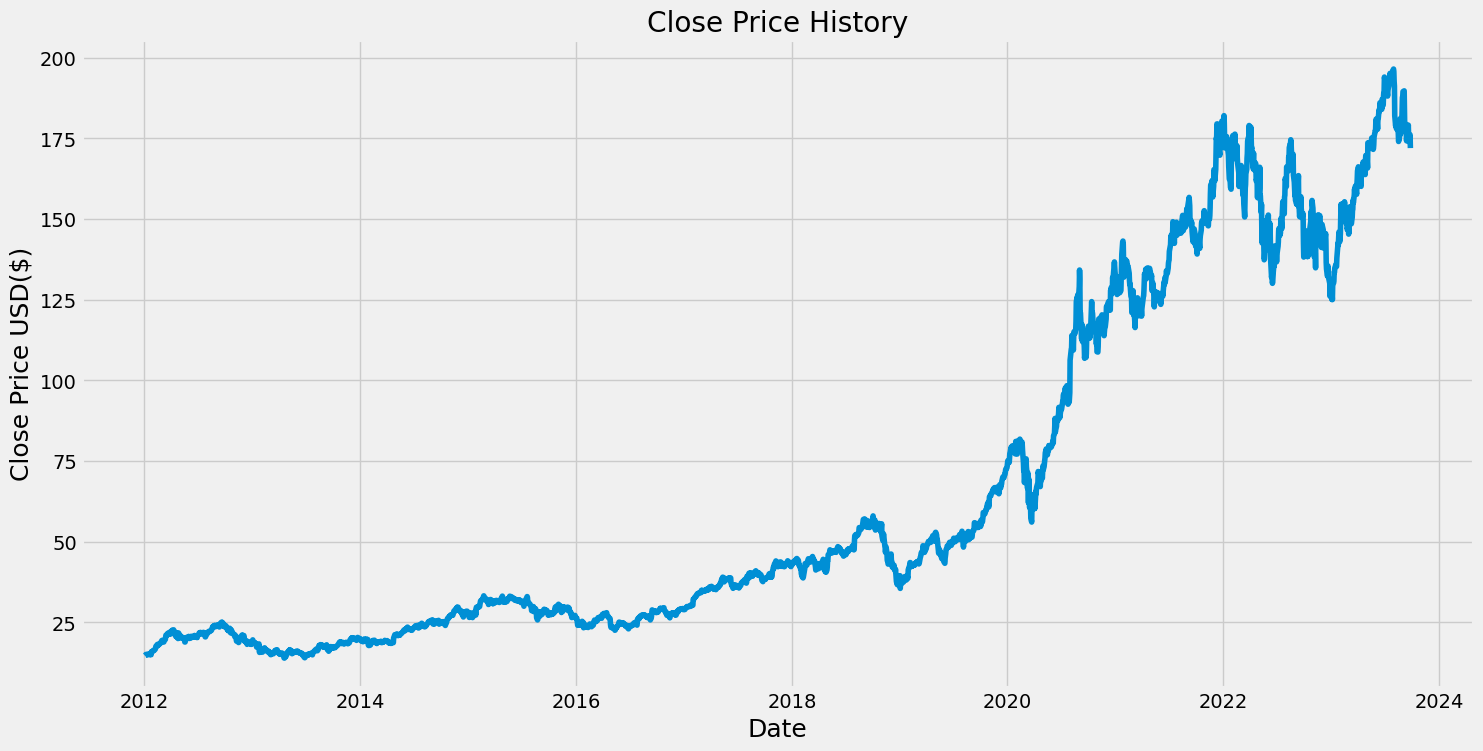

In [4]:
#Plotting the Historical Stock Prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [5]:
#Data Preprocessing
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2362

In [6]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.88131667],
       [0.88838512],
       [0.86581011]])

In [7]:
#Creating Training Data Sequences
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [8]:
#convert the x_train & y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2302, 60, 1)

In [10]:
#Building the LSTM Mode

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2)) # Add dropout with 20% probability
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2)) # Add dropout with 20% probability
model.add(Dense(25))
model.add(Dropout(0.2)) # Add dropout with 20% probability
model.add(Dense(1))


In [11]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#Training the Model 
model.fit(x_train,y_train,batch_size=1,epochs=1)

2302/2302 [==============================] - 87s 35ms/step - loss: 0.0024


In [13]:
#creating the testing data set
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#convert the data to numpy arrays
x_test = np.array(x_test)

In [15]:
#reshape the data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
predictions=model.predict(x_test)#get predicted value

19/19 [==============================] - 2s 32ms/step


In [17]:
predictions=scaler.inverse_transform(predictions)#denormalise

In [18]:
rmse=np.sqrt(np.mean((predictions-y_test)**2))#Calculating RMSE
rmse

6.657161840805872

C:\Users\madha\AppData\Local\Temp\ipykernel_14440\3702456315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


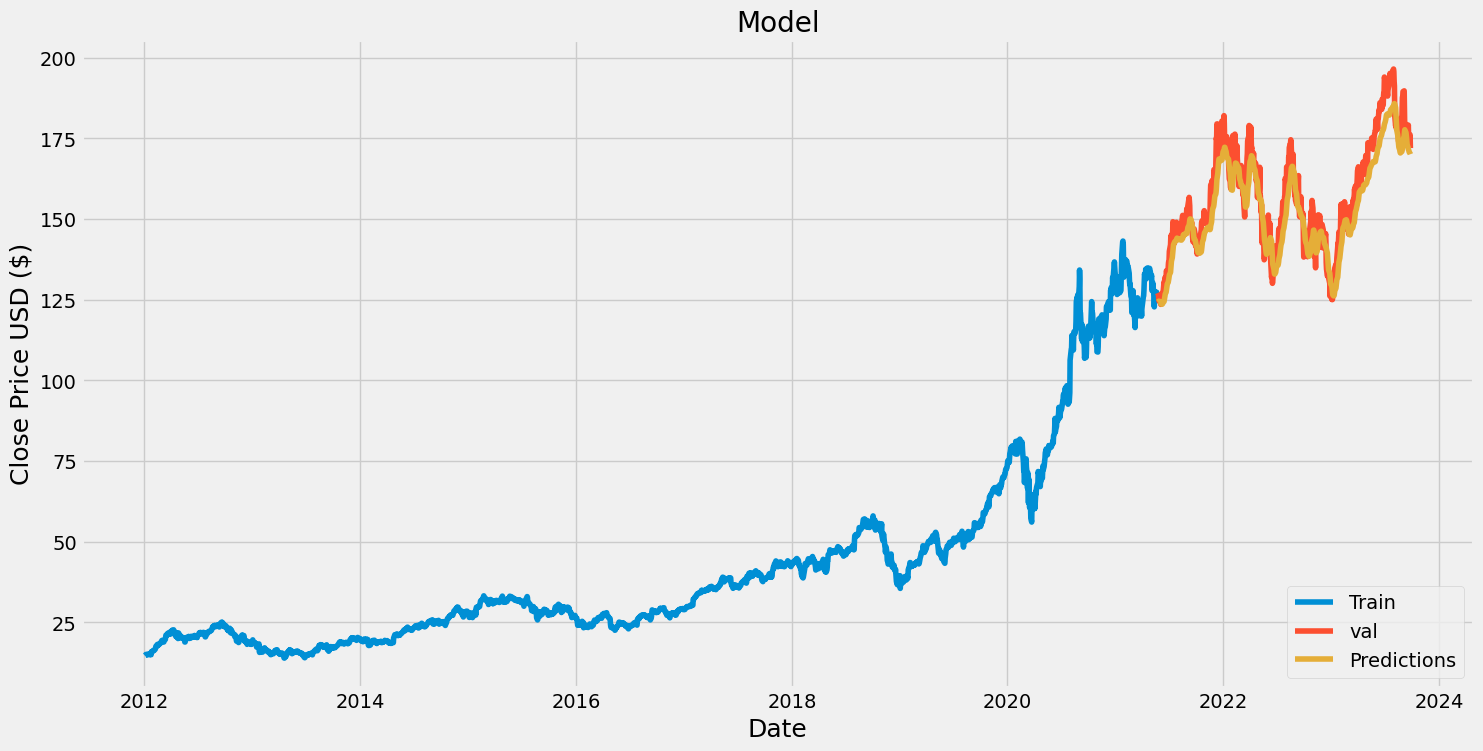

In [19]:
train=data[:training_data_len]   #Plotting Predictions
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

In [20]:
 # ... (Previous code)

# Extend the time frame to include the next 30 days
 # Adjust the end date

df = yf.download('AAPL',start='2012-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))


[*********************100%%**********************]  1 of 1 completed


In [21]:
from datetime import datetime, timedelta

# Use current date as the start date
start_date = datetime.now()

# Generate future dates for 30 days ahead
future_dates = [start_date + timedelta(days=i) for i in range(1, 31)]


In [22]:
# Data preprocessing
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# ... (Additional code)


In [23]:
# Generate sequences for the 30-day prediction period
x_future = []

for i in range(len(df) - 60, len(df)):
    x_future.append(scaled_data[i - 60:i, 0])

x_future = np.array(x_future)
x_future = np.reshape(x_future, (x_future.shape[0], x_future.shape[1], 1))




In [24]:
# Make predictions for the future
future_predictions = model.predict(x_future)
future_predictions = scaler.inverse_transform(future_predictions)

# ... (Plotting code, including future predictions)

2/2 [==============================] - 0s 25ms/step


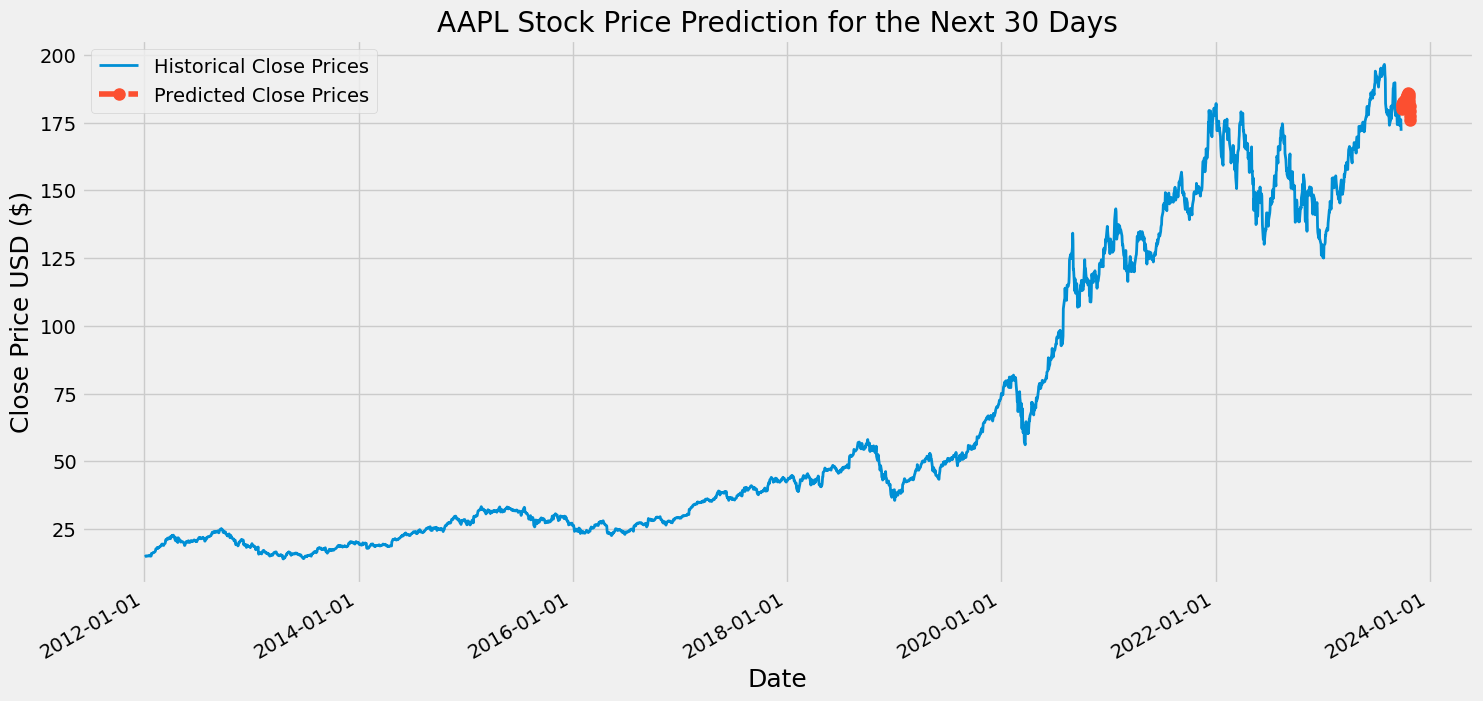

In [25]:
# ... (Previous code)

# Plotting code for predictions of the next 30 days
plt.figure(figsize=(16, 8))
plt.title('AAPL Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot historical data
plt.plot(df.index, df['Close'], label='Historical Close Prices', linewidth=2)

# Plot only the predictions for the next 30 days
plt.plot(future_dates, future_predictions[:30], label='Predicted Close Prices', marker='o', markersize=8, linestyle='--')

plt.legend(loc='upper left')
plt.grid(True)

# Format the x-axis ticks with proper date labels
from matplotlib.dates import DateFormatter

date_formatter = DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gcf().autofmt_xdate()  # Automatically format date labels for better readability

plt.show()
